In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

601

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d01dee4169709e4462f152bd55dd0929


In [7]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [8]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | san jose
Processing Record 2 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 3 of Set 1 | puerto ayora
Processing Record 4 of Set 1 | belmonte
Processing Record 5 of Set 1 | hamilton
Processing Record 6 of Set 1 | svetlogorsk
Processing Record 7 of Set 1 | provideniya
Processing Record 8 of Set 1 | dubrovnik
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | ilulissat
Processing Record 11 of Set 1 | cidreira
Processing Record 12 of Set 1 | halalo
City not found. Skipping...
Processing Record 13 of Set 1 | bluff
Processing Record 14 of Set 1 | phan rang
City not found. Skipping...
Processing Record 15 of Set 1 | pevek
Processing Record 16 of Set 1 | sao filipe
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | mahebourg
Processing Record 20 of Set 1 | aksu
Processing Record 21 of Set 1 | busselton
Processing Record 22 of Set 1 | ponta delgada
Processing 

Processing Record 38 of Set 4 | la ronge
Processing Record 39 of Set 4 | otjimbingwe
Processing Record 40 of Set 4 | quang ngai
Processing Record 41 of Set 4 | devyatka
City not found. Skipping...
Processing Record 42 of Set 4 | trairi
Processing Record 43 of Set 4 | puerto baquerizo moreno
Processing Record 44 of Set 4 | kandrian
Processing Record 45 of Set 4 | hithadhoo
Processing Record 46 of Set 4 | tiksi
Processing Record 47 of Set 4 | naziya
Processing Record 48 of Set 4 | luba
Processing Record 49 of Set 4 | boguchany
Processing Record 50 of Set 4 | saryshagan
City not found. Skipping...
Processing Record 1 of Set 5 | stoyba
City not found. Skipping...
Processing Record 2 of Set 5 | butaritari
Processing Record 3 of Set 5 | vanavara
Processing Record 4 of Set 5 | xingyi
Processing Record 5 of Set 5 | liwale
Processing Record 6 of Set 5 | new norfolk
Processing Record 7 of Set 5 | yerbogachen
Processing Record 8 of Set 5 | alta floresta
Processing Record 9 of Set 5 | krasnoselkup

Processing Record 27 of Set 8 | ola
Processing Record 28 of Set 8 | huntington
Processing Record 29 of Set 8 | petropavlovsk-kamchatskiy
Processing Record 30 of Set 8 | almaty
Processing Record 31 of Set 8 | marzuq
Processing Record 32 of Set 8 | lagoa
Processing Record 33 of Set 8 | talnakh
Processing Record 34 of Set 8 | mujiayingzi
Processing Record 35 of Set 8 | puerto boyaca
Processing Record 36 of Set 8 | negombo
Processing Record 37 of Set 8 | crixas
Processing Record 38 of Set 8 | tasbuget
City not found. Skipping...
Processing Record 39 of Set 8 | velikodvorskiy
Processing Record 40 of Set 8 | urucara
Processing Record 41 of Set 8 | bayburt
Processing Record 42 of Set 8 | zhaoyang
Processing Record 43 of Set 8 | belaya gora
Processing Record 44 of Set 8 | naze
Processing Record 45 of Set 8 | ondangwa
Processing Record 46 of Set 8 | bhavani
Processing Record 47 of Set 8 | sobolevo
Processing Record 48 of Set 8 | mazatlan
Processing Record 49 of Set 8 | yusva
City not found. Ski

City not found. Skipping...
Processing Record 17 of Set 12 | leninskoye
Processing Record 18 of Set 12 | kamenskoye
City not found. Skipping...
Processing Record 19 of Set 12 | iqaluit
Processing Record 20 of Set 12 | manta
Processing Record 21 of Set 12 | meulaboh
Processing Record 22 of Set 12 | port alberni
Processing Record 23 of Set 12 | bathsheba
Processing Record 24 of Set 12 | taylorville
Processing Record 25 of Set 12 | mapiripan
Processing Record 26 of Set 12 | sumkino
Processing Record 27 of Set 12 | hongjiang
Processing Record 28 of Set 12 | rungata
City not found. Skipping...
Processing Record 29 of Set 12 | miri
Processing Record 30 of Set 12 | dushanbe
Processing Record 31 of Set 12 | ust-kamchatsk
City not found. Skipping...
Processing Record 32 of Set 12 | boende
Processing Record 33 of Set 12 | college
Processing Record 34 of Set 12 | alotau
City not found. Skipping...
Processing Record 35 of Set 12 | vydrino
Processing Record 36 of Set 12 | gomel
Processing Record 37

In [9]:
len(city_data)

549

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,San Jose,37.3394,-121.8950,53.01,76,40,6.91,US,2021-01-22 03:22:01
1,Puerto Ayora,-0.7393,-90.3518,75.99,93,92,1.01,EC,2021-01-22 03:26:07
2,Belmonte,-15.8631,-38.8828,77.00,78,0,6.91,BR,2021-01-22 03:26:07
3,Hamilton,39.1834,-84.5333,41.00,52,1,10.36,US,2021-01-22 03:25:30
4,Svetlogorsk,52.6333,29.7333,34.16,92,99,10.13,BY,2021-01-22 03:26:07
5,Provideniya,64.3833,-173.3000,26.60,93,90,26.84,RU,2021-01-22 03:26:07
6,Dubrovnik,42.6481,18.0922,53.60,87,75,12.66,HR,2021-01-22 03:26:07
7,Ushuaia,-54.8000,-68.3000,46.40,81,75,25.32,AR,2021-01-22 03:26:07
8,Ilulissat,69.2167,-51.1000,15.80,67,89,2.30,GL,2021-01-22 03:26:07
9,Cidreira,-30.1811,-50.2056,74.25,84,99,17.29,BR,2021-01-22 03:26:08


In [11]:
# reorder the columns
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']

city_data_df = city_data_df[new_column_order]

city_data_df.head(20)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,San Jose,US,2021-01-22 03:22:01,37.3394,-121.8950,53.01,76,40,6.91
1,Puerto Ayora,EC,2021-01-22 03:26:07,-0.7393,-90.3518,75.99,93,92,1.01
2,Belmonte,BR,2021-01-22 03:26:07,-15.8631,-38.8828,77.00,78,0,6.91
3,Hamilton,US,2021-01-22 03:25:30,39.1834,-84.5333,41.00,52,1,10.36
4,Svetlogorsk,BY,2021-01-22 03:26:07,52.6333,29.7333,34.16,92,99,10.13
5,Provideniya,RU,2021-01-22 03:26:07,64.3833,-173.3000,26.60,93,90,26.84
6,Dubrovnik,HR,2021-01-22 03:26:07,42.6481,18.0922,53.60,87,75,12.66
7,Ushuaia,AR,2021-01-22 03:26:07,-54.8000,-68.3000,46.40,81,75,25.32
8,Ilulissat,GL,2021-01-22 03:26:07,69.2167,-51.1000,15.80,67,89,2.30
9,Cidreira,BR,2021-01-22 03:26:08,-30.1811,-50.2056,74.25,84,99,17.29


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

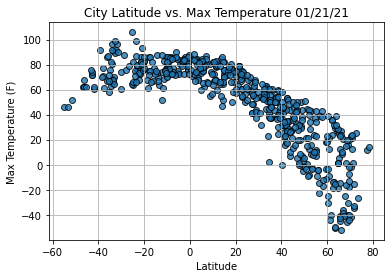

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

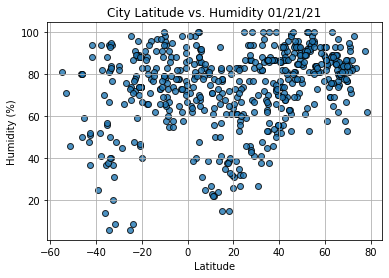

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

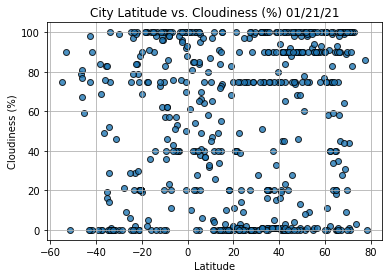

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

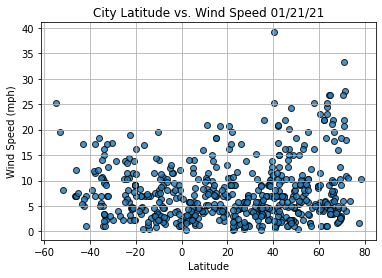

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [18]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [19]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [20]:
index13 = city_data_df.loc[13]
index13

City                       Albany
Country                        US
Date          2021-01-22 03:22:00
Lat                       42.6001
Lng                      -73.9662
Max Temp                    33.01
Humidity                       59
Cloudiness                     23
Wind Speed                   5.19
Name: 13, dtype: object

In [21]:
city_data_df["Lat"]>=0


0       True
1      False
2      False
3       True
4       True
       ...  
544    False
545    False
546     True
547    False
548     True
Name: Lat, Length: 549, dtype: bool

In [22]:
# Create North/South Hemishphere DF
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

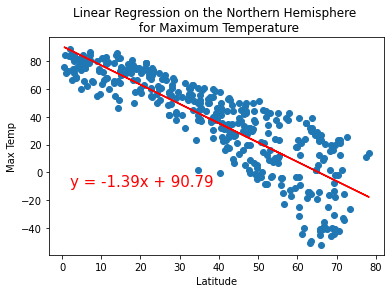

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(2,-10))


In [24]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,San Jose,US,2021-01-22 03:22:01,37.3394,-121.8950,53.01,76,40,6.91
3,Hamilton,US,2021-01-22 03:25:30,39.1834,-84.5333,41.00,52,1,10.36
4,Svetlogorsk,BY,2021-01-22 03:26:07,52.6333,29.7333,34.16,92,99,10.13
5,Provideniya,RU,2021-01-22 03:26:07,64.3833,-173.3000,26.60,93,90,26.84
6,Dubrovnik,HR,2021-01-22 03:26:07,42.6481,18.0922,53.60,87,75,12.66


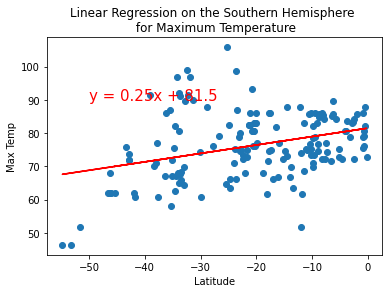

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

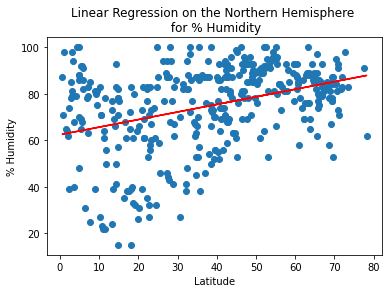

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(45,10))

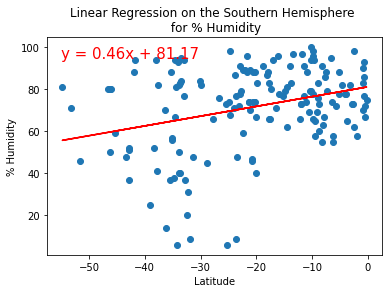

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-55,95))

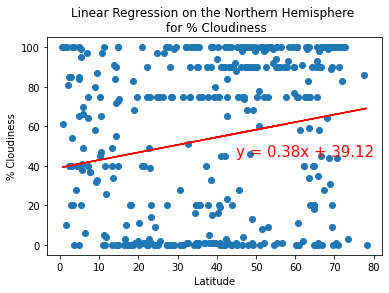

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(45,45))

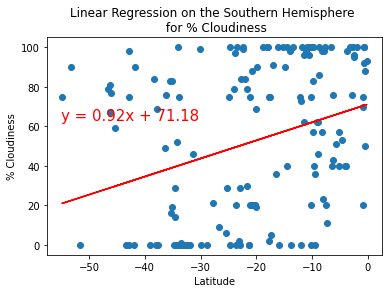

In [29]:
# Linear regression on the South Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-55,63))

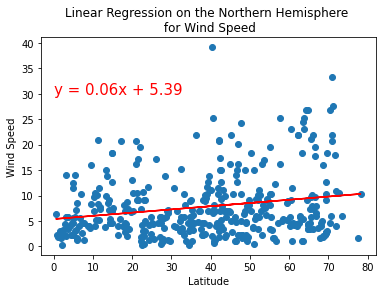

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(0,30))

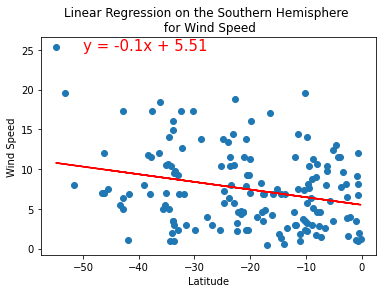

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,25))